In [1]:
# Import the required libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plot the adjusted closing prices of multiple ETFs over a given period.

    Parameters:
    tickers (list): List of ETF tickers (e.g., ['SPY', 'SPDN']).
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Download historical data for the tickers
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Ensure 'Adj Close' or 'Close' column exists
    if "Adj Close" in data.columns:
        data = data["Adj Close"]
    elif "Close" in data.columns:
        data = data["Close"]
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the data.")

    # Normalize prices to start at 100 for better comparison
    normalized_data = (data / data.iloc[0]) * 100

    # Plot the normalized data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    # Add title, labels, legend, and grid
    plt.title("SPY vs. SPDN Performance Comparison", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
    plt.legend(tickers, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

In [3]:
# Set the tickers and time range
tickers = ["SPY", "SPDN"]
start_date = "2020-01-01"
end_date = "2020-12-31"

In [4]:
# Download and inspect the data structure
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())
print("Columns available:", data.columns)

Price           Close                   High                    Low  \
Ticker           SPDN         SPY       SPDN         SPY       SPDN   
Date                                                                  
2020-01-02  21.593899  301.194885  21.725015  301.213446  21.593899   
2020-01-03  21.754452  298.914246  21.861485  300.054619  21.683097   
2020-01-06  21.674177  300.054474  21.897163  300.137912  21.674177   
2020-01-07  21.727694  299.210907  21.761587  299.961876  21.710746   
2020-01-08  21.628687  300.805573  21.692014  302.038636  21.540384   

Price                        Open             Volume            
Ticker             SPY       SPDN         SPY   SPDN       SPY  
Date                                                            
2020-01-02  299.025418  21.638497  299.961822  14800  59151200  
2020-01-03  297.699715  21.816887  297.755340  36000  77709700  
2020-01-06  297.013479  21.897163  297.134010   6900  55653900  
2020-01-07  298.756597  21.723233  299.47

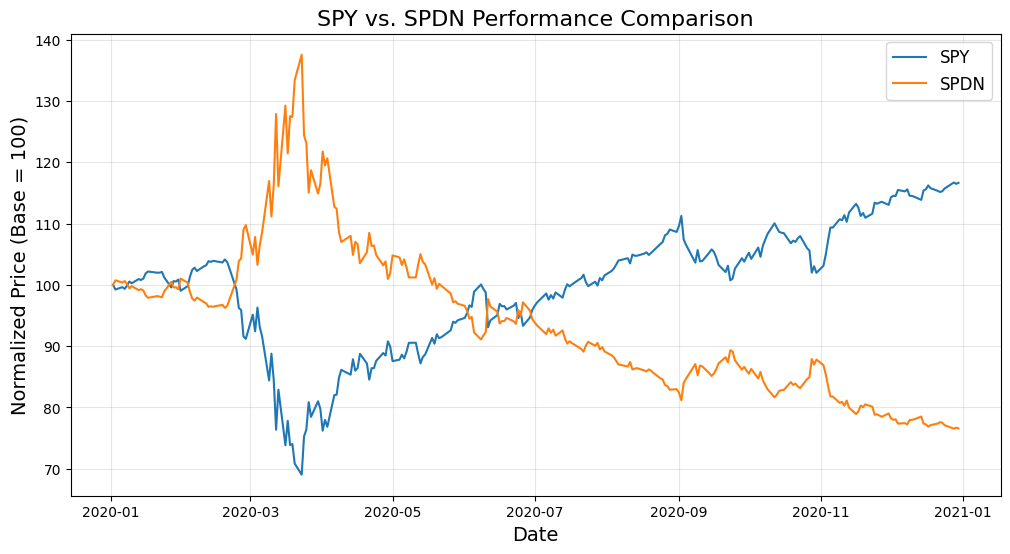

In [5]:
# Call the function to plot the comparison
plot_etfs_comparison(tickers, start_date, end_date)